Implementation of a linear regression model using pandas, numpy classes to represent data

Dataset could contain 50, 100, 200, 500, 1000, 2000, 5000, 10000 scores

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [91]:
# Single dataset initialisation
data = pd.read_csv("gpa_train_500_scores.csv")
dataset_number = len(data)

In [92]:
# Multiple datasets initialisation
dataframes = []
for i in [50, 100, 200, 500, 1000, 2000, 5000, 10000]:
    dataframes.append(pd.read_csv(f"gpa_train_{i}_scores.csv"))

Training data(X) contains scores for subjects gotten from **gpa_generator.ipynb**
Target data(y) contains GPA corresponding to scores gotten from **gpa_generator.ipynb**

In [93]:
# Single dataset split between training and target data
X = data[data.columns[~data.columns.isin(['gpa'])]]
y = data[data.columns[data.columns.isin(['gpa'])]]['gpa']
X = X.to_numpy()
y = np.array(y)

In [94]:
# Multiple datasets split between training and target data
train_X, target_y = [], []
for i in range(len(dataframes)):
    X_values = dataframes[i][dataframes[i].columns[~dataframes[i].columns.isin(['gpa'])]]
    y_values = dataframes[i][dataframes[i].columns[dataframes[i].columns.isin(['gpa'])]]['gpa']
    train_X.append(X_values.to_numpy())
    target_y.append(np.array(y_values))

len(train_X) == len(target_y)

True

Normalise X (i.e. scores to be a fraction of a 100) to range from 0 to 1, append bias to the training dataset and initialise theta

In [95]:
# Single dataset normalisation
def normalise(matrix, divisor):
    return np.divide(matrix, divisor)

normaliser = 100
X = normalise(X, normaliser)
for i in range(dataset_number):
    X[i, 0] = 1
theta = np.full(len(data.columns) - 1, 0)

In [96]:
# Multiple dataset normalisation
for i in range(len(dataframes)):
    train_X[i] = normalise(train_X[i], normaliser)
    for j in range(len(train_X[i])):
        train_X[i][j, 0] = 1

Gradient descent implementation and cost calculation

In [97]:
def gradient_descent(X, y, theta, learn_rate, iterations):
    theta_ = theta
    costs = []
    for _ in range(iterations):
        hypothesis = np.matmul(X, theta_)
        error = hypothesis - y
        err_sqr = np.square(error)
        cost = sum(err_sqr) / (2 * y.size)
        costs.append(cost)
        j = ((learn_rate / y.size) * (np.matmul(np.transpose(X), error)))
        theta_ = theta_ - j
        
    return theta_, costs

Varying learning rates while keeping iterations constant

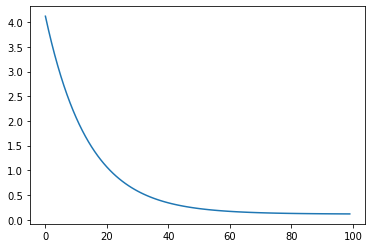

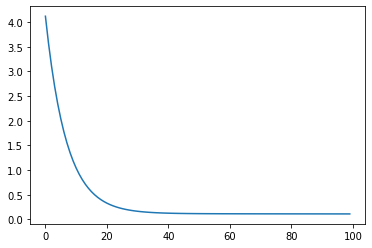

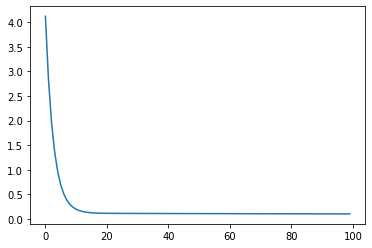

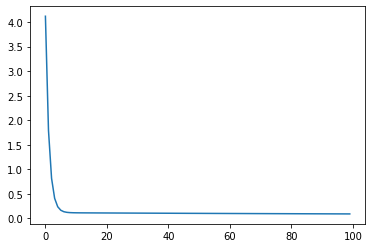

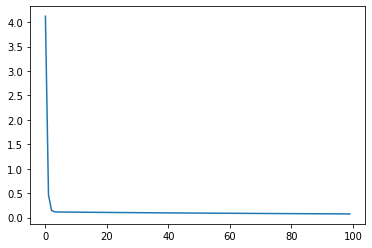

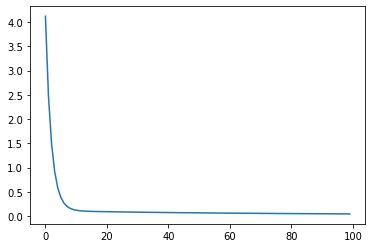

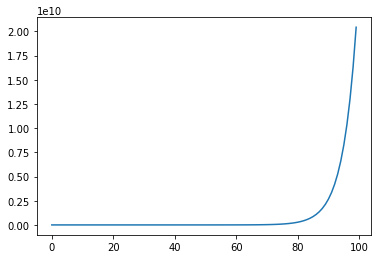

In [98]:
learn_rates = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.6]
for i in learn_rates:
    iters = 100
    theta_, costs = gradient_descent(X, y, theta, i, iters)
    plt.plot(np.arange(iters), costs)
    plt.show()


Varying iteration values while keeping learning rate constant (i.e. 0.5) from the graphs results

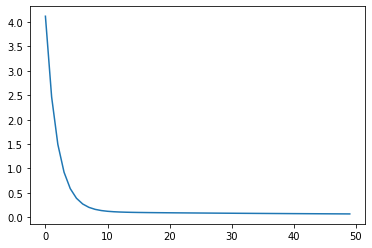

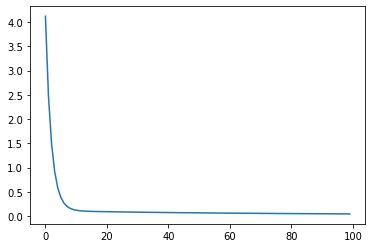

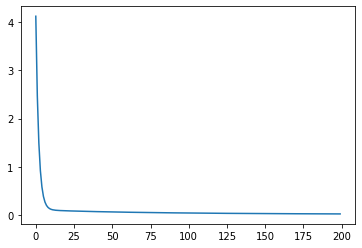

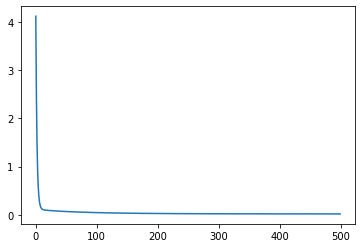

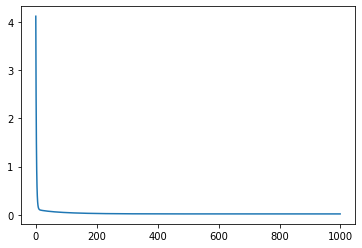

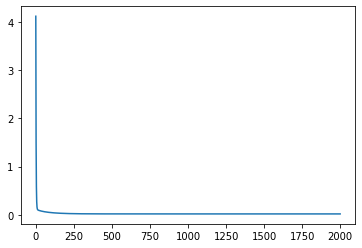

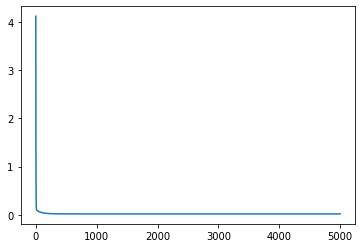

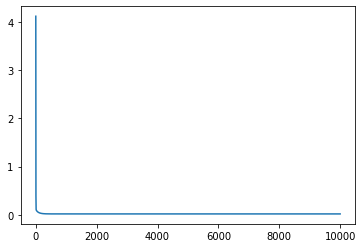

In [99]:
itrtns = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
for i in itrtns:
    learn_rate = 0.5
    theta_, costs = gradient_descent(X, y, theta, learn_rate, i)
    plt.plot(np.arange(i), costs)
    plt.show()

In [100]:
theta_values, cost_values = [], []
learn_rate, iters = 0.5, 1000
for i in range(len(dataframes)):
    tht = np.full(len(data.columns) - 1, 0)
    tht, cst = gradient_descent(train_X[i], target_y[i], tht, learn_rate, iters)
    theta_values.append(tht)
    cost_values.append(cst)

Predictor takes in an arrray containing values and predicts the GPA

In [101]:
def predictor(array, theta):
    array_ = normalise(array, normaliser)
    array_ = np.insert(array_, 0, 1., axis=0)
    prediction = np.matmul(theta, array_)
    return prediction

# Single dataset predictor
pred_scores = np.array([[70], [81], [56], [65], [87], [60], [54], [78]])
print(predictor(pred_scores, theta_))
    

[4.21366765]


In [102]:
# Multiple dataset predictor
predictions = [predictor(pred_scores, theta_values[i]) for i in range(len(theta_values))]
predictions

[array([4.14822673]),
 array([4.17908737]),
 array([4.20154133]),
 array([4.21115903]),
 array([4.17618464]),
 array([4.19329176]),
 array([4.20218073]),
 array([4.20238645])]

In [103]:
def gpa_calc(scores_list, course_units):
    summation = 0
    for i in range(len(scores_list)):
        if scores_list[i] >= 70:
            summation += 5 * course_units[i]
        elif scores_list[i] >= 60:
            summation += 4 * course_units[i]
        elif scores_list[i] >= 50:
            summation += 3 * course_units[i]
        elif scores_list[i] >= 45:
            summation += 2 * course_units[i]
        elif scores_list[i] >= 40:
            summation += 1 * course_units[i]
        else:
            summation += 0

    return summation / sum(course_units)

gpa_calc(pred_scores, [3, 4, 2, 3, 3, 3, 1, 3])
    

4.454545454545454

Graph comparing actual GPA scores calculated with linear regression predictor

Single dataset test

In [104]:
test_data = pd.read_csv("gpa_test_scores.csv")

In [105]:
calculated_gpa = test_data[test_data.columns[test_data.columns.isin(['gpa'])]]['gpa']
calculated_gpa = np.array(calculated_gpa)

In [106]:
prediction_data = test_data[test_data.columns[~test_data.columns.isin(['gpa'])]]
prediction_data = prediction_data.to_numpy()

In [107]:
predicted_gpa = np.array([])
for i in range(len(test_data)):
    predicted_gpa = np.append(predicted_gpa, predictor(prediction_data[i][1:], theta_))

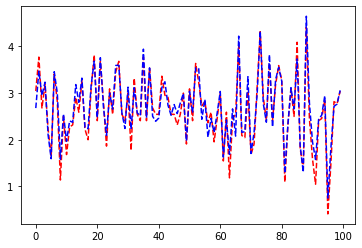

In [108]:
plt.plot(calculated_gpa, 'r--', predicted_gpa, 'b--')
plt.show()

Multiple datasets test

In [109]:
predicted_gpa_values = []
for tht in range(len(theta_values)):
    predicted_gpa = np.array([])
    for i in range(len(test_data)):
        predicted_gpa = np.append(predicted_gpa, predictor(prediction_data[i][1:], theta_values[tht]))
    predicted_gpa_values.append(predicted_gpa)

len(predicted_gpa_values)

8

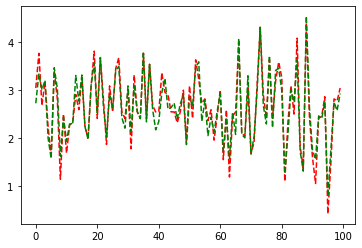

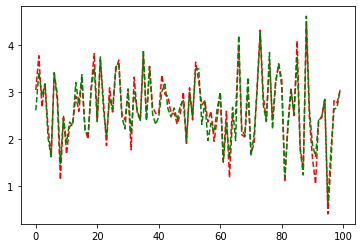

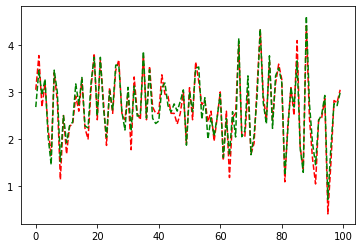

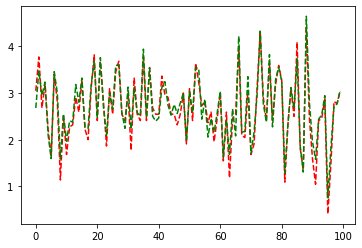

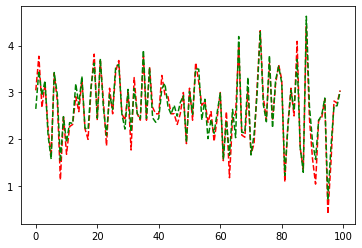

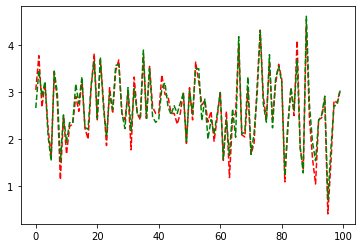

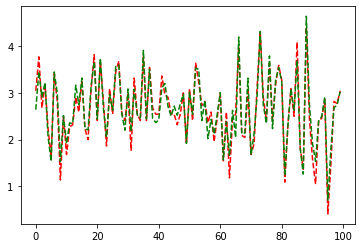

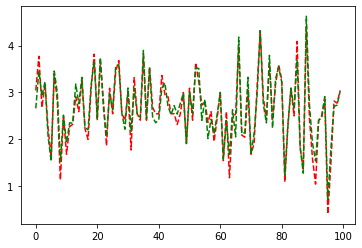

In [110]:
for i in predicted_gpa_values:
    plt.plot(calculated_gpa, 'r--', i, 'g--')
    plt.show()

Accuracy measure is mean squared error

In [111]:
def mean_square_diff(calculated, predicted):
    diff = calculated - predicted
    square_of_diff = np.square(diff)
    return np.sum(square_of_diff)
    

In [112]:
mean_square_diff(calculated_gpa, predicted_gpa)

3.7149168530058088

In [113]:
accuracy_measures = []
for i in predicted_gpa_values:
    accuracy_measures.append(mean_square_diff(calculated_gpa, i))
accuracy_measures

[4.470150422722748,
 3.9918267246465966,
 3.7674999850198794,
 4.027796042492592,
 3.739525999067144,
 3.6957885948591693,
 3.6814564945974992,
 3.7149168530058088]